# Hazard models

**Aging** - increased chance of death with age.

You have seen this picture on the previous lesson {cite}`lifetables`.  

![Risk of mortality](https://upload.wikimedia.org/wikipedia/en/4/4d/USGompertzCurve.svg)

At this lesson we learn how to understand such mortality risk and survival curves. We will learn Gompertz model - the seminal conception in aging research. We learn how to analyze real survival data, fit survival models, compare survival curves, and make conclusions about your survival experiment.

## Survival curve

Let $T$ is a non-negative random variable with a corresponding distribution function:

$$F(t) = P(T\leq t)$$ 

We call $T$ - *survival time* or time before death of some object (e.g. human). For example, $T$ can have normal distribution:

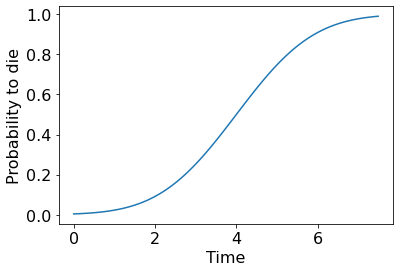

In [26]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = '16' # increase font size

rv = norm(loc=4, scale=1.5)
t = np.linspace(0, norm.ppf(0.99, loc=4, scale=1.5), 100)
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Time')
ax.set_ylabel('Probability to die')
ax.plot(t, rv.cdf(t));

If $F(t)$ is a probability to die before time moment $T$ we can introduce a probability to survive before this moment $S$ as just a complement to $F$:

$$S(t) = P(T > t) = 1 - F(t)$$ 

Let's draw it:

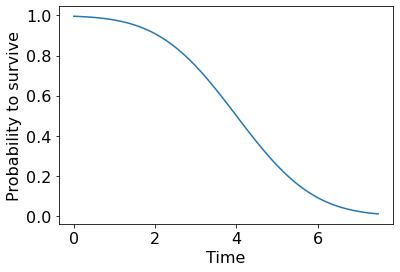

In [41]:
rv = norm(loc=4, scale=1.5)
t = np.linspace(0, norm.ppf(0.99, loc=4, scale=1.5), 100)
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Time')
ax.set_ylabel('Probability to survive')
ax.plot(t, 1 - rv.cdf(t));

This plot is what we actually call *survival curve*. The intuition behind this is rather straightforward - it shows how many of experimental objects survived before a partucular moment of time. You can see a lot of empirical versions of such curves in articles. Rigorous analysis of this curves helps to avoid a misinterpretation of typical drug-testing experiment or other. And it's what we are going to do in further.

## Mortality risk

You could have heard that mortality risk increases exponentially with aging. But what does this actually mean?

```{note}
:class: dropdown
Mortality risk is **not** a probability of death!
```

Let's consider instantaneous probability of death that the object will die within a time interval $dt$ by condition that it already survived to moment $T$:

$$\lim_{dt \to 0}\frac{P(t < T ≤ t + dt | T > t)}{dt}$$

This conditional probability can be decomposed by definition as follows: 

$$P(A ∩ B) = P(A|B)P(B)$$

This yields:

$$P(t < T ≤ t + dt ∩ T > t) = P(t < T ≤ t + dt | T > t)P(T > t)$$

$$P(t < T ≤ t + dt | T > t) = \frac{P(t < T ≤ t + dt ∩ T > t)}{P(T > t)}$$

Recall that $P(T > t) = 1 - F(t) = S(t)$ and $P(t < T ≤ t + dt) = F(t+dt) - F(t)$.

```{note}
:class: dropdown
To understand the last property it is enough to remember that probability function is just a area under probability density function!
```

Now let's rewrite our result:

$$P(t < T ≤ t + dt | T > t) = \frac{F(t+dt) - F(t)}{S(t)}$$

It's time to put our derivation to the first formula with a limit. So, we have:

$$\lim_{dt \to 0}\frac{P(t < T ≤ t + dt | T > t)}{dt} = \lim_{dt \to 0}\frac{F(t+dt) - F(t)}{dt}\frac{1}{S(t)} = \frac{f(t)}{S(t)}$$

Yes, we obtained a ratio of probability density function of death and probability of survival. And this is what we call **mortality risk function** or hazard function.

$$m(t) = \frac{f(t)}{S(t)} = -\frac{S'(t)}{S(t)}$$

```{admonition} Exercise
:class: dropdown
Show that $f(t) = -S'(t)$.
```

This is actually the thing that increases exponentially as we age and have a name of Gompertz law (quite more complex than just a probability, isn't it?). Now let's consider different kinds of such functions.

## Gompertz law and other kinds of mortality functions

### Constant risk model

We start with the simplest case of a constant mortality function. 

$$
    m(t) = m_0
$$
$$
    S(t) = \exp(-m_0t)
$$
$$
    f(t) = m_0\cdot \exp(-m_0t)
$$

```{admonition} Exercise
:class: dropdown
Derive an expression for $S(t)$ at constant risk. **Hint:** use the result from the previous exercise.
```

Let's draw plots for $m$ and $S$:

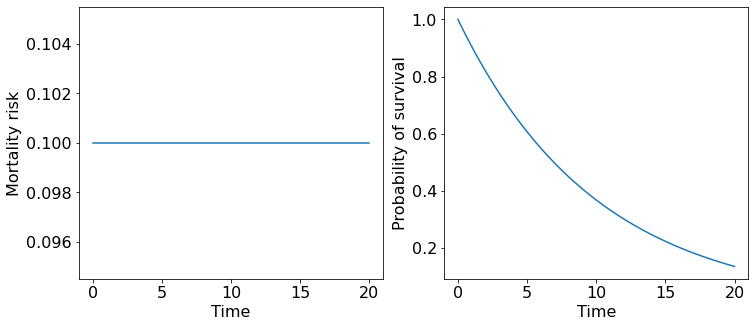

In [42]:
t = np.linspace(0, 20, 200)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

m0 = 0.1

ax[0].plot(t, np.ones(len(t)) * m0)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Mortality risk')

ax[1].plot(t, np.exp(-m0*t))
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Probability of survival');

The corresponding survival curve resembles a [distribution](https://en.wikipedia.org/wiki/Exponential_distribution) of time until radioactive particle decay or so called *"law of rare events"* where events independently occur with a rate $m_0$. Intuitively, we can treat this survival curve describing survivability of an extremely fragile organism, which dies from a single failure - technically speaking, such organism is unaging! Then, $m_0$ actually describes average number of failures per unit of time and, correspondingly, $1/m_0$ - is a **mean survival time**.

```{admonition} Exercise
:class: dropdown
Prove that $1/m_0$ - is a mean survival time using a definition of expectation.
```

We obtained an object, or system, with survivability depending on one critical subsystem what is not reliable. Can we do better? Sure, we can add an additional critical sustystem reserving the original. As a naive example, just imagine an organism's life depends only of two kidney functioning. If one fails the other can work for two. This (of course) oversimplified system can be represented with the following diagram of parallel connection,

<img src="https://drive.google.com/uc?id=1eY5Nz_I4eI-YUqU_5RkWuzVeeHfxoelH" 
     alt="parallel" 
     width="180"/>

where $m_1$ and $m_2$ are failure risks, which we assume constant and not equal in general. How to derive a survival curve for such a system? First, let's assume that both critical subsystems, let's call them $X$ and $Y$, are independent what means that the failure of one does not affect the failure rate of the other. Then, we may consider joint probability distribution that the whole system fails:

$$ F_{X,Y}(t) = F_X(t)\cdot F_Y(t) $$

Recall that $F(t) = 1-S(t)$,

$$ F_{X,Y}(t) = (1-S_X(t))\cdot (1-S_Y(t)) = (1 - e^{-m_1t})(1 - e^{-m_2t}) = 1 - e^{-m_1t} -  e^{-m_2t} +  e^{-(m_1+m_2)t}$$

And now we return to survival curve:

$$ S_{X,Y}(t) = e^{-m_1t} +  e^{-m_2t} -  e^{-(m_1+m_2)t}$$

$$ m_{X,Y}(t) = \frac{-S_{X,Y}'(t)}{S_{X,Y}(t)} = \frac{m_1e^{-m_1t} +  m_2e^{-m_2t} -  (m_1 + m_2)e^{-(m_1+m_2)t}}{e^{-m_1t} +  e^{-m_2t} -  e^{-(m_1+m_2)t}}$$

Let's draw it!

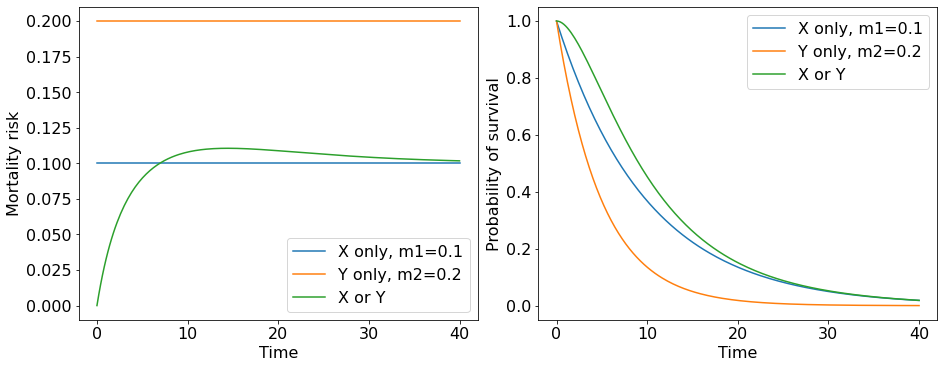

In [43]:
t = np.linspace(0, 40, 200)
m1 = 0.1
m2 = 0.2

dt = t[1] - t[0]
SX = np.exp(-m1*t)
SY = np.exp(-m2*t)
SXY = np.exp(-m1*t) + np.exp(-m2*t) - np.exp(-(m1 + m2)*t) 
mXY = (m1 * np.exp(-m1*t) + m2 * np.exp(-m2*t) - (m1 + m2) * np.exp(-(m1 + m2)*t)) /\
      (np.exp(-m1*t) + np.exp(-m2*t) - np.exp(-(m1 + m2)*t))

fig, ax = plt.subplots(1, 2, figsize=(13, 5), constrained_layout=True)

ax[0].plot(t, [m1] * len(t), label=f'X only, m1={m1}')
ax[0].plot(t, [m2] * len(t), label=f'Y only, m2={m2}')
ax[0].plot(t, mXY, label='X or Y')
ax[0].legend()
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Mortality risk');

ax[1].plot(t, SX, label=f'X only, m1={m1}')
ax[1].plot(t, SY, label=f'Y only, m2={m2}')
ax[1].plot(t, SXY, label='X or Y')
ax[1].legend()
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Probability of survival');

We see the lower value of mortality risk the higher survival curve lies if we consider our kidneys (critical subsystems) separately. Combining them into one system leads to the highest survival curve (green curve on the plot). Thus we see a quite obvious corollary: the higher number of reserved subsystems object have the more survival it becomes... But wait a second! What's wrong with the mortality curve for two kindeys system? It is not constant now. We started with two kidneys each having its own constant failure risk and ended with a system where mortality risk is now a function of time - **aging system** actually! It is quite reasonable if we treat aging as a process of critical subsystem failures culminating with system "death". 

In fact, you may consider human organism as a just a combination of parallel and sequential connections of such critical subsystems (organs) - not bad model for a start (see, for example {cite}`gavrilov2005reliability`). To calculate a survival curve of a particular complex model, you may just use the following formulas considering your system as a set of sequential and parallel block connections.
 
<img src="https://nanohub.org/app/site/resources/2013/01/16583/slides/016.03.jpg" alt="connections" width="600"/>

```{admonition} Exercise
:class: dropdown
Compute an expression for mortality risk of sequential subsystems connection.
```

### Weibull risk model

Let's proceed with our example of aging system consisted from "unaging" or fragile elements. Now let's assume that we have $n$ independent subsystems having the same constant mortality rate $m$ and connected in parrallel within a system $Z$. Using the formula above we have:

$$ S_Z(t) =  1 - (1 - S(t))^n = 1 - (1 - e^{-mt})^n$$

Now let's derive a mortality risk:

$$ m_{Z}(t) = \frac{-S'(t)}{S(t)} = \frac{nme^{-mt}(1 - e^{-mt})^{n-1}}{1 - (1 - e^{-mt})^{n}}$$

And draw it:

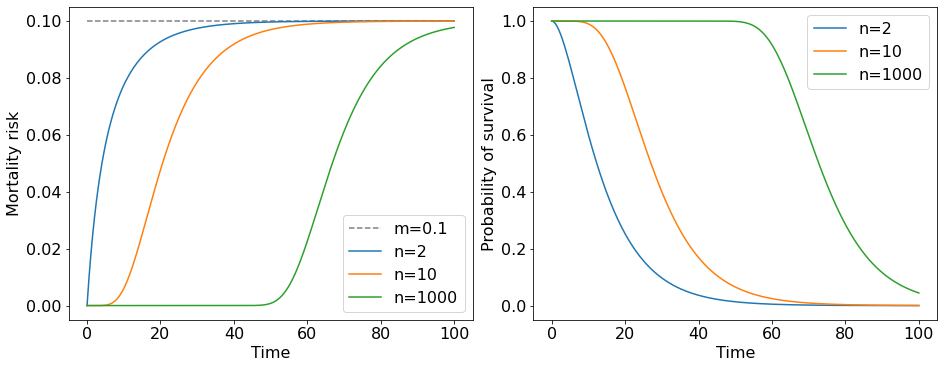

In [44]:
t = np.linspace(0, 100, 200)
m = 0.1
n1 = 2
n2 = 10
n3 = 1000

SZ = lambda n: 1 - (1 - np.exp(-m * t))**n
mZ = lambda n: (n * m * np.exp(-m * t) * (1 - np.exp(-m * t))**(n-1)) / (1 - (1 - np.exp(-m * t))**n)

fig, ax = plt.subplots(1, 2, figsize=(13, 5), constrained_layout=True)

ax[0].plot(t, [m] * len(t), label=f'm={m}', ls='--', color='grey')
ax[0].plot(t, mZ(n1), label=f'n={n1}')
ax[0].plot(t, mZ(n2), label=f'n={n2}')
ax[0].plot(t, mZ(n3), label=f'n={n3}')
ax[0].legend()
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Mortality risk');

ax[1].plot(t, SZ(n1), label=f'n={n1}')
ax[1].plot(t, SZ(n2), label=f'n={n2}')
ax[1].plot(t, SZ(n3), label=f'n={n3}')
ax[1].legend()
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Probability of survival');

The immediate conclusion follows from this plot: the mortality risk of the system at later stages of life doesn't depend on the number of reserve elements in the system and only on failure rates of particular elements. Having a large number of reserve element a survivability of an object can be high for quite long time.

You may note that an expression for mortality risk is quite cumbersome for general $n$ elements case. At the same time we see that all the mortality curves on the plot above approaches to the constant mortality risk $m$ as $t \to \infty$. It turns out that at early stages of the life, more precisely when $t \ll 1/m$, we obtain a nice approximation of the original formula, namely:

$$ m_Z(t) \approx nm^nt^{n-1} = nat^{n-1} $$

this is exactly a **Weibull risk** model with a scale parameter $a=m^n$ linked with the pace of aging. The corresponding survival and probability density functions will be:

$$ S(t) = e^{-at^n} $$ 

$$ f(t) = nat^{n-1}e^{-at^n} $$

The latter expression is a [Weibull distribution](https://en.wikipedia.org/wiki/Weibull_distribution) density function known for its high flexibility for modelling a lot of biological and technical phenomena. Interestingly, the mortality risk for our system of $n$ elements growths as a power function of time - the higher number of parallel fragile elements we have the faster the function growths! This implies one important corollary for us: it is not a good strategy to have an infinite number of low-reliable critical elements in our system, instead, it is better to have a number of highly-reliable elements (with low mortality risk) confering us a great lifespan. 

### Gompertz risk model

Weibull model provides a nice explanation of aging phenomena in terms of elements reliability. Unfortunately, the reality is harder. It turns out that weibull risk model has "too slow" speed of growth. The actual observable mortality of different species obeys exponential law. This is the place where Benjamin Gompertz appears. He found that the force of mortality increases in geometrical progression with the age of adult humans. According to the Gompertz law, human mortality risk **doubles about every 8 years** of adult age {cite}`gavrilov2015`. Moreover, an exponential mortality behaviour is observed for many biological species, including fruit flies, nematodes, flour beetles, mice, dogs, and baboons {cite}`gavrilov2005reliability`. Mathematically, it can be formulated as follows:

$$ m(t) = Ae^{bt} $$

where $A$ - Initial Mortality Rate (IMR), this parameter characterizes the initial mortality, that is, the mortality that would be in the population without aging, and does not depend on age; $b$ - characterizes the rate of aging. To clarify the previous observation about Mortality Rate Doubling Time (MRDT) is 8 years, we can use the following simple quotient:

$$2 = \frac{Ae^{bt_2}}{Ae^{bt_1}} = \frac{e^{bt_2}}{e^{bt_1}}=e^{b(t_2-t_1)}=e^{b*MRDT} \rightarrow$$

$$ \ln{2} = b*MRDT \rightarrow MRDT = \frac{\ln{2}}{b} $$

from where we get the value of $b = \ln{2} / MRDT = 0.087$ for humans. Those who did the previous exercises could note that the survival function can be elegantly written as:

$$ S(t) = \exp{\left(-\int_0^{t}m(x)dx\right)} $$

Putting Gompertz risk to the intergral yields the following expression for the survival curve:

$$S(t) = e^{-\frac{A}{b}(e^{bt} - 1)}$$

```{admonition} Exercise
:class: dropdown
Derive the formula for the Gompertz survival curve from scratch.
```

It's time to draw!

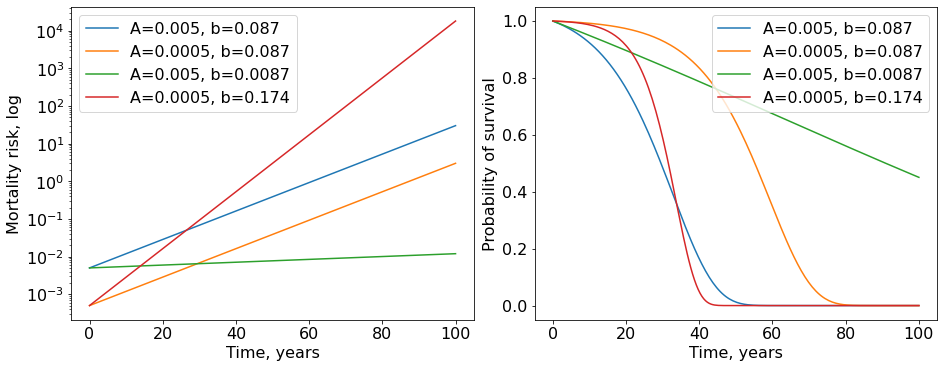

In [45]:
t = np.linspace(0, 100, 200)
A1, b1 = (0.005, 0.087)
A2, b2 = (0.0005, 0.087)
A3, b3 = (0.005, 0.0087)
A4, b4 = (0.0005, 0.174)

SZ = lambda A, b: np.exp(-A / b * (np.exp(b * t) - 1))
mZ = lambda A, b: A * np.exp(b * t)

fig, ax = plt.subplots(1, 2, figsize=(13, 5), constrained_layout=True)

ax[0].semilogy(t, mZ(A1, b1), label=f'A={A1}, b={b1}')
ax[0].semilogy(t, mZ(A2, b2), label=f'A={A2}, b={b2}')
ax[0].semilogy(t, mZ(A3, b3), label=f'A={A3}, b={b3}')
ax[0].semilogy(t, mZ(A4, b4), label=f'A={A4}, b={b4}')
ax[0].legend()
ax[0].set_xlabel('Time, years')
ax[0].set_ylabel('Mortality risk, log');

ax[1].plot(t, SZ(A1, b1), label=f'A={A1}, b={b1}')
ax[1].plot(t, SZ(A2, b2), label=f'A={A2}, b={b2}')
ax[1].plot(t, SZ(A3, b3), label=f'A={A3}, b={b3}')
ax[1].plot(t, SZ(A4, b4), label=f'A={A4}, b={b4}')
ax[1].legend()
ax[1].set_xlabel('Time, years')
ax[1].set_ylabel('Probability of survival');

We used basic parameters $A=0.005$ and $b=0.087$ for human mortality risk according to {cite}`missov2015gompertz` (see Fig.3). Such parameters yield blue curves of survival and mortality. Since we have more or less realistic parameters inferred from real data, now time have units of years. Now we introduce three modifications of Gompertz parameters. First, we decrease IMR ($A$) by 10 times holding $b$ the same. The result is the orange curve demonstrating moving to right from the initial curve. This increases the maximum human lifespan of the population. Second, we decrease rate of aging ($b$) by 10 times preserving IMR the same and the result is a much greater (green curves) increase in maximum lifespan by comparing with modification of IMR. This hints us that it is more promising strategy to **improve the rate of aging than IMR**. Moreover, if we improve IMR by 10 times but deteriorate rate of aging by only 2 times (red curve) we obtain the population that ages very quickly after some time - exactly what we see in countries with advanced medicine.

## Estimation and comparison of survival curves

The time has come to consider real data and understand how to estimate survival curves from them, and, what is more important, how to compare them. For these purposes we use a [lifelines](https://lifelines.readthedocs.io/en/latest/index.html) that is a nice library survival analysis. First, let's look at the toy dataset of *miR-137* gene knock-out in fruit flies.

```{note}
:class: dropdown
We didn't find any references to "waltons" dataset but there is some study showing that *miR-137* gene knock-out (apparently) affects lifespan {cite}`grimes2020mir`.
```



In [67]:
from lifelines.datasets import load_waltons
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') #for a clean output

df = load_waltons()
print("Data shape", df.shape, '\n')
print(df['group'].value_counts(), '\n') #group counts
print(df['E'].value_counts()) #event counts
df.head(5)

Data shape (163, 3) 

control    129
miR-137     34
Name: group, dtype: int64 

1    156
0      7
Name: E, dtype: int64


,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137


We see a standard survival analysis data where columns **T** contains life durations or particular individuals (flies); **group** contains information about whether an individual was case (34 entries with knock-outed gene) or control (129 entries). The column **E** is something new and inavoidable in real data analysis. This is a **censoring** variable showing either event (death in our case) happened or we have lost the ability to observe the event (e.g. some issues with accidentally killing flies or if some escape). (More information about censoring you can find here [censoring](https://tinyheero.github.io/2016/05/12/survival-analysis.html#censoring)) Censoring is especially prevalent in survival analysis of human data (survivability after treatment, surgery, etc.) but in experiments with animals we can overcome some troubles with censoring by just excluding bad data entries. In our case it is not a big problem to exclude 7 of 163 samples - let's do it and consider purified dataframe in a more human-readable format.

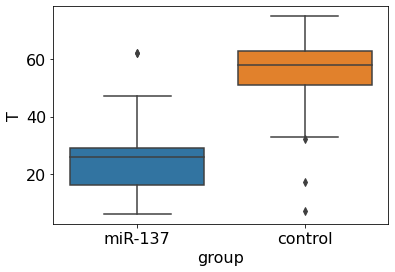

In [68]:
df = df[df.E != 0]
sns.boxplot(x='group', y='T', data=df);

Things are getting clear! We apparently see quite strong an effect of decreasing of average lifespan in knock-outed flies. However, we do not see a dynamics: what about maximum lifespan and concaveness of survival curve? The whole picture is available only after estimation of survival curve from data.

### Kaplan-Meier estimator

There are a plenty approaches to estimate survival curve or mortality risk from data. Most of them could be splitted into two big classes: parametric and non-parametric. The first class includes Gompertz or Weibull estimators mentioned above. They have a lot of nice properties which we discuss in the next session but also one disadvantage - they assume some model behind. In most cases we do not know the true model generating our observations. So, we may use non-parametric estimators which are free from model assumptions. The most frequently used is a [Kaplan-Meier estimator](https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator) having a nice property to be **unbiased estimate** of $S(t)$ when censoring excluded:

$$ {\widehat {S}}(t)=\prod \limits _{i:\ t_{i}\leq t}\left(1-{\frac {d_{i}}{n_{i}}}\right) $$

where $t_{i}$ a time when **at least** one event happened, $d_i$ the number of deaths (events) that happened at time $t_{i}$, and $n_{i}$ the individuals known to have survived (have not yet had an event or been censored) up to time $t_{i}$.   Let's learn how to use this formula step by step.

In [69]:
from lifelines import KaplanMeierFitter
import autograd.numpy as np

T = df['T']
km = KaplanMeierFitter(alpha=0.05) #alpha - level of significance for confidence interval estimation, see below.
km.fit(T)
km.event_table.head(7) #please, look at this nice table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,156,156
6.0,1,1,0,0,156
7.0,1,1,0,0,155
9.0,3,3,0,0,154
13.0,3,3,0,0,151
15.0,2,2,0,0,148
17.0,1,1,0,0,146


Yes, we call model class and fit it, but don't worry it is just for convenience and brevity of an explanation. The event table above contains 5 columns and time steps as indexes. You see that indexes are grouped by the same time steps in such way that several events could happen within one time step. Note, there are no time steps without events (with exception of zero time step)! Now columns, you see that column **censored** contains zeros because we excluded censored observations. This means that the column **observed**, containing death events, and the column **removed** will be the same (however, different models can treat with these columns differently) and corresponding the term $d_i$ in the formula above. Column **entrance** is redundant and needed just for convenience of probability computation (see below). The last column **at_risk** corresponds to the term $n_i$ - the number of individuals known to have survived up to time $t_{i}$ (we assume that all the individuals dies in the end of a time step). Some code now:

In [70]:
test = km.event_table
test['p'] = 1 - test['removed'] / test['at_risk'] #use formula above
test['S'] = test['p'].cumprod() #cumulative product
test.head(7)

,removed,observed,censored,entrance,at_risk,p,S
event_at,,,,,,,
0.0,0,0,0,156,156,1.000000,1.000000
6.0,1,1,0,0,156,0.993590,0.993590
7.0,1,1,0,0,155,0.993548,0.987179
9.0,3,3,0,0,154,0.980519,0.967949
13.0,3,3,0,0,151,0.980132,0.948718
15.0,2,2,0,0,148,0.986486,0.935897
17.0,1,1,0,0,146,0.993151,0.929487


Applying the recurrent formula is easy with `cumprod()` method. Now we compare the **S** column with what package provides as a result.

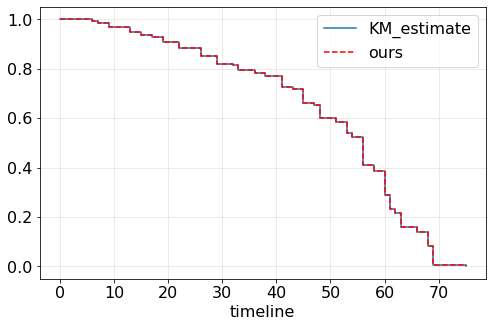

In [71]:
ax = km.plot_survival_function(figsize=(8,5), ci_show=False) #built-in method
ax.step(test.index, test['S'], where='post', label='ours', ls='--', color='red') #from scratch
ax.legend();
ax.grid(alpha=0.3); #add 

Exactly what we wanted!

One problem left. We need to split our observations by groups. 

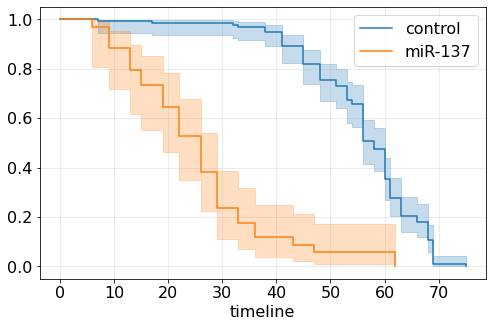

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
km = KaplanMeierFitter(alpha=0.05)

for name, grouped_df in df.groupby('group'):
    km.fit(grouped_df["T"], label=name)
    km.plot_survival_function(ax=ax)
ax.grid(alpha=0.3) 

We have much to say now. Apparently, *miR-137* knock-out is not just a shifting survival curve to the left (see Gompertz section) but this intervention makes the organism fragile - orange curve is similar to an exponential survival curve (constant mortality risk). In turn, blue curve demonstrates clear Gompertz pattern of normal aging, doesn't it? At the same time, maximal lifespan seems to be not affected much, isn't it? Both curves are shown with their 95% confidence interval (CI). It's wider for *miR-137* curve due to the higher variance. By the way, the variance of our estimate can be computed by Greenwood formula as follows:

$${\widehat {\operatorname {Var} }}\left({\widehat {S}}(t)\right)={\widehat {S}}(t)^{2}\sum _{i:\ t_{i}\leq t}{\frac {d_{i}}{n_{i}(n_{i}-d_{i})}}$$

One of the nice property of Kaplan-Meier estimate $\widehat {S}$ is that it is **asymptotically normal**. We may use this property for construction a [confidence interval](http://www.medicine.mcgill.ca/epidemiology/hanley/c609/material/KaplanMeierEstimator.pdf):

$$ CI:\ [\widehat {S}(t) - z_{1-\alpha/2}\sqrt{{\widehat {\operatorname {Var} }}\left({\widehat {S}}(t)\right)},\ \widehat {S}(t) + z_{1-\alpha/2}\sqrt{{\widehat {\operatorname {Var} }}\left({\widehat {S}}(t)\right)}] $$

where $z_{1-\alpha/2}$ is a $1-\alpha/2$ quantile of normal distribution. 

Owing two Kaplan-Meier curves it would be nice to compare them by calculating some important statistics. Mean survival time and median survival time are good candidates. Consider the expression for the first one:

$$ \widehat{\mu}(t) = \int_0^t S(x)dx $$

```{admonition} Exercise
:class: dropdown
Prove that $\int_0^t S(x)dx = \int_0^t xf(x)dx$
```

Of course we have a function for this:

In [111]:
from lifelines.utils import restricted_mean_survival_time

km = KaplanMeierFitter(alpha=0.05)
for name, grouped_df in df.groupby('group'):
    km.fit(grouped_df["T"], label=name)
    mu = restricted_mean_survival_time(km)
    print(name + f' {round(mu, 2) }')

control 56.08
miR-137 25.71


```{admonition} Exercise
:class: dropdown
Explore [lifelines](https://lifelines.readthedocs.io/en/latest/index.html) documentation, write code for median survival time computation. Compare and explain results.
```

Comparing means is a nice first shot to say that something is different. But in aging domain there are a lot of situations when means are very close to each other (especially when you test some new drug in mice). How to conduct more rigorous analysis? Wouldn't it be better to compare the survival curves themselves?

### Logrank test 

Okay, we need to compare two survival curves. [Logrank](https://web.stanford.edu/~lutian/coursepdf/survweek3.pdf) is probably the most popular nonparametric test doing that. Let's designate $S_0(t)$ and $S_1(t)$ as control and case survival curves (control and *mir-137* in our case). Formulate null hypothesis:

* $H_0$: $S_0(t) = S_1(t)$
* $H_A$: $S_0(t) \neq S_1(t)$

Essentially, to conduct logrank we need to construct contingency table for each time step at which an event happened and compute chi-squared statistics. Once statistics computed it's easy to calculate p-value and address to null hypothesis. Do it in a few steps:

1. Compute the contingency table for each time step with event in **at least** one group as follows:

|   |  died at $t_i$ | at risk at $t_i$| | 
|-:|:-:|:-:|-|
|  control (0) | $d_{0i}$  | $n_{0i} - d_{0i}$ | $n_{0i}$  |
|  case (1) | $d_{1i}$ | $n_{1i} - d_{1i}$ | $n_{1i}$  | 
| | $d_{i}$ | $n_{i} - d_{i}$ | $n_{i} $|

2. Prepare all important terms for summation:

$O_i = d_{1i}$ - observed number of deaths;

$E_i = d_{i}\frac{n_{1i}}{n_i}$ - expected number of deaths;

$V_i = \frac{n_{1i}n_{0i}d_i(n_{i}-d_i)}{n_{i}^2(n_{i}-1)}$ - variance of the observed number of deaths;

3. Compute logrank test statistics:

$$\chi^2_{logrank} = \frac{\sum_{i}(O_i - E_i)^2}{\sum_{i}V_i} \sim \chi^2(1)\ \text{under}\ H_0$$

This can be quite cumbersome for calculating from scratch, happily, everything already done for us in lifelines.

In [127]:
from lifelines.statistics import logrank_test

#split our groups
df1 = df[df['group']!='control']
df0 = df[df['group']=='control']
T1, G1 = df1['T'], df1['group']
T0, G0 = df0['T'], df0['group']
# and apply test directly to durations
results = logrank_test(T1, T0)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         114.43 <0.005     86.30

The result is here and we can surely *reject null hypothesis about equality of survival curves at the 0.005 level of significance*. It worth to repeat that using statistical tests is really important in survival analysis, especially in aging domain where you can see as tiny results can be presented as a big advance in science, frequently without rigorous statistical comparison of case-control curves.

There are some important facts you should know about logrank test:
* logrank test has maximum power when survival functions are proportional, with coefficient $k>1$: $S_1(t) = kS_2(t)$;
* logrank test is sensitive to differences in tails of distributions;
* logrank test has low power if two curves intersect.

### Gompertz estimator*

This is an additional subsection developing an intuition about fitting custom parametric estimators by power of [lifelines](https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Piecewise%20Exponential%20Models%20and%20Creating%20Custom%20Models.html?highlight=Gompertz#Univarite-models-in-lifelines). We spend a lot of time discussing Gompertz risk model, so it would be inexcusably not to fit Gompertz model on our pretty flies data. Do it!

<lifelines.GompertzFitter:"Gompertz_estimate", fitted with 156 total observations, 0 right-censored observations>
   number of observations = 156
number of events observed = 156
           log-likelihood = -641.37
               hypothesis = A_ != 1, b_ != 1

---
     coef   se(coef)   coef lower 95%   coef upper 95%
A_   0.01       0.00             0.00             0.02
b_   5.90       0.44             5.05             6.76

     cmp to       z      p   -log2(p)
A_     1.00 -231.87 <0.005        inf
b_     1.00   11.26 <0.005      95.28
---
AIC = 1286.75

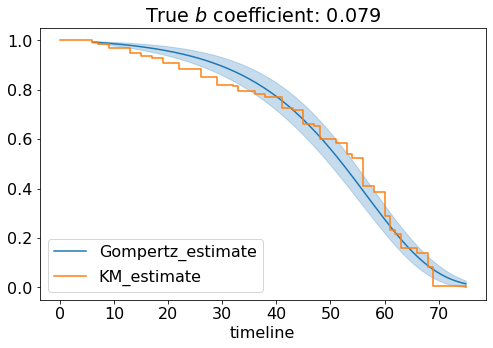

In [139]:
from lifelines.fitters import ParametricUnivariateFitter

df0 = df[df['group']=='control']
T0 = df['T']
Tmax = T0.max() #normalization constant needed for optimizer convergence

#Below we create custom class with Gompertz model parametrized as it was discussed above.
#This model inherits all important methods and atributes of parent class ParametricUnivariateFitter which is also using
#for fitting other simple models like exponential one (constant risk).
class GompertzFitter(ParametricUnivariateFitter): 
    # parametrization as above
    _fitted_parameter_names = ['A_', 'b_']

    def _cumulative_hazard(self, params, times): #cumulative hazard is just an integral of risk function
        A_, b_ = params
        return A_ * (np.expm1(times * b_ / Tmax)) #expm1 = exp(...) - 1

ggf = GompertzFitter(alpha=0.05) #fit Gompertz model
ggf.fit(T0)
ggf.print_summary()

ax = ggf.plot_survival_function(figsize=(8,5))
ax = KaplanMeierFitter().fit(T0).plot(ax=ax, ci_show=False) #and compare with KM
ax.set_title(f'True $b$ coefficient: {round(ggf.b_/Tmax, 3)}'); #rescale coefficient

Yeah, it is really a good fit. We used only data from naturally aging flies and obtained nice estimation of Gompertz rate of aging $b=0.08$ (please, ignore the coefficient in the table - it should be rescaled due to the presense of normalization constant `Tmax`) and $A=0.01$ which are quite close to what we have seen for humans. The summary table has many interesting things like Akaike information criterion (AIC) useful for comparison of different models, log-likelihood and important statistics about coefficients. For now, we can definitely say, Gompertz model is a good model of aging flies!

## Conclusion

* Mortality curves  can have different shapes (increasing, decreasing, u-shape, const) which say us a lot about aging of a particular organism.
* Constant mortality function models "non-aging" organism which has only one critical subsystem and therefore is fragile.
* Combination of a big number of fragile subsystems leads us to a Weibull mortality risk. It is already a good approximation of what really happens in reality but we can do better with...
* Gompertz risk model which has a nice approximation power or real data. Its parameters are well interpretable as initial mortality risk and rate of aging. Not all species obey Gompertz model but, as always, more complexity means less interpretability.
* Real data requires proper estimators of survival curves. One great non-parametric way is to use Kaplan-Meier approach.
* Logrank and other statistical tests are important to check difference between two survival curves, and, therefore, if the experiment really significant for aging science.
* Remember, everything here are models, wrong but useful!

* Nice cheatsheet for transformation rules here:

<img src="https://lifelines.readthedocs.io/en/latest/_images/map.png" alt="connections" width="500"/>

## Cox proportional hazards model [Project]

**Disclaimer**: within this project section we will use "mortality risk" and "hazard" as synonyms (i.e. $m(t)=h(t)$) in the sense we discussed them in the previous sections. 

**Learn [the documentation](https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html#cox-s-proportional-hazard-model) about Cox proportional hazards models.**

Now is the time of advanced topics! The idea behind [Cox’s proportional hazard model](https://en.wikipedia.org/wiki/Proportional_hazards_model#The_Cox_model) is that the log-hazard of an individual is a linear function of their covariates (independent of time) and a population-level baseline hazard that changes over time. Mathematically:

$$\underbrace{h(t | x)}_{\text{hazard}} = \overbrace{b_0(t)}^{\text{baseline hazard}} \underbrace{\exp \overbrace{\left(\sum_{i=1}^n b_i (x_i - \overline{x_i})\right)}^{\text{log-partial hazard}}}_ {\text{partial hazard}}$$

Note a few behaviors about this model: the only time component is in the baseline hazard, $b_0(t)$. In the above equation, the partial hazard is a time-invariant scalar factor that only increases or decreases the baseline hazard. Thus changes in covariates will only inflate or deflate the baseline hazard

### Task

Reproduce the Cox proportional hazards analysis from [this paper](https://www.nature.com/articles/s41467-021-23014-1?ref=upstract.com&curator=upstract.com) on NHANES dataset. Critically consider the paper and answer the following questions:

* What the main idea of using Cox analysis in the paper?
* What is the Gompertz mortality doubling rate from NHANES cohort?
* What are the main achievements of the paper?
* What pitfalls the paper has?
* What can you propose to improve the paper?

Write report and prepare a presentation.

## Learn more
* [Reliability theory textbook](https://crr.umd.edu/sites/crr.umd.edu/files/Free%20Ebook%20Probability%20Distributions%20Used%20in%20Reliability%20Engineering.pdf)
* [Russian video lecture](https://www.youtube.com/watch?v=rLNzoYmnkgQ&ab_channel=ComputerScienceCenter).
* [Gompertz model colab notebook by Alexander Fedintsev](https://colab.research.google.com/drive/1Po-OMzIJ_4hVVj5O7btc8OmjJlu0N3cQ?usp=sharing#scrollTo=-_cpx007cIMn)
* [Python library for hazard modeling](https://lifelines.readthedocs.io/en/latest/index.html)

There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)

## Credits

This notebook was prepared by [Dmitrii Kriukov](https://scholar.google.com/citations?user=Wo9H1f4AAAAJ&hl=ru).

## Acknowledgements

We thank [Alexander Fedintsev](https://scholar.google.com/citations?hl=ru&user=J2F6xmcAAAAJ&view_op=list_works&sortby=pubdate), who made a significant contribution to the theoretical part of this notebook.